### 사전작업

**라이브러리 imports**

In [1]:
import pandas as pd
import numpy as np

from autogluon.tabular import TabularPredictor

import warnings
warnings.filterwarnings('ignore')

**파일 가져오기**

In [3]:
!kaggle competitions download -c bike-sharing-demand
!unzip bike-sharing-demand.zip -d data
sampleSubmission = pd.read_csv('data/sampleSubmission.csv')
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
!rm -rf data
!rm bike-sharing-demand.zip

100%|█████████████████████████████████████████| 189k/189k [00:00<00:00, 827kB/s]
100%|█████████████████████████████████████████| 189k/189k [00:00<00:00, 825kB/s]
Archive:  bike-sharing-demand.zip
  inflating: data/sampleSubmission.csv  
  inflating: data/test.csv           
  inflating: data/train.csv          


In [5]:
df_train_featured = df_train.copy()
df_test_featured = df_test.copy()
#----# 
df_train_featured = df_train_featured.drop(['casual','registered'],axis=1)
#--#
df_train_featured['hour'] = df_train_featured['datetime'].apply(pd.to_datetime).dt.hour
df_test_featured['hour'] = df_test_featured['datetime'].apply(pd.to_datetime).dt.hour
df_train_featured['weekday'] = df_train_featured['datetime'].apply(pd.to_datetime).dt.weekday
df_test_featured['weekday'] = df_test_featured['datetime'].apply(pd.to_datetime).dt.weekday
#--#
df_train_featured = df_train_featured.drop(['datetime'],axis=1)
df_test_featured = df_test_featured.drop(['datetime'],axis=1)
#--#
df_train_featured = df_train_featured.drop(['atemp'],axis=1)
df_test_featured = df_test_featured.drop(['atemp'],axis=1)

## 문제

box-cox transform이 아닌 `log1p`변환을 취하여 결과를 구하라

* 변환

<Axes: >

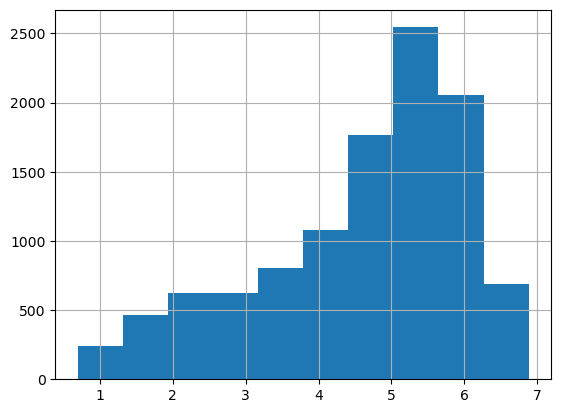

In [10]:
count2 = np.log1p(df_train_featured['count'])
count2.hist()

* 적합

In [13]:
## step 1 : pass
## step 2 : creating predictor
predictr = TabularPredictor(label = 'count', verbosity = False)

## step 3 : fitting
predictr.fit(df_train_featured.assign(count = count2))

## step 4 : prediction and inverse transform
yhat = predictr.predict(df_train_featured.assign(count = count2))
yyhat = predictr.predict(df_test_featured)
yhat = np.expm1(yhat)
yyhat = np.expm1(yyhat)

* 제출

In [14]:
sampleSubmission['count'] = yyhat
sampleSubmission.assign(count = lambda _df : _df['count'].apply(lambda x : x if x>0 else 0)).to_csv('submission.csv', index = False)
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "Autogloun : log transformation"
!rm submission.csv

100%|████████████████████████████████████████| 242k/242k [00:02<00:00, 98.4kB/s]
Successfully submitted to Bike Sharing Demand

* 결과

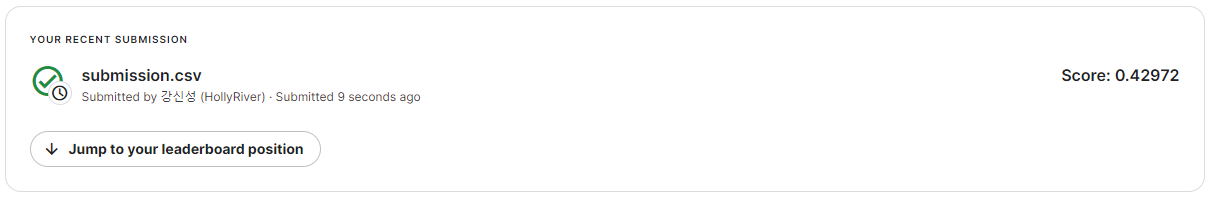

**끝**